In [6]:
%%html
<style>
.output_wrapper, .output { height:auto !important; max-height:10000px; } /* your desired max-height here */
.output_scroll {     box-shadow:none !important; webkit-box-shadow:none !important; }
.noborder, .noborder tr, .noborder th, .noborder td { border-collapse: collapse; border: 0px; border: none!important; }
</style>

# Adding HTML o/p capabilities to Bash in the Notebook

I've provided an '*html*' function which enables display of html within the notebook

Below examples of pretty printing HTML from various sources

In [7]:
echo "<b>Notebook last run $(date)</b>" | html

In [8]:
echo "<h1>An html header <!-- A comment --></h1>" | html

In [9]:
echo "<h1>A table <!-- A comment --></h1>
<table><tr><th>col1</th>
<th>col2</th>
<th>col3</th>
<th>col4</th>
</tr>
<tr><td>val1</td>
    <td>val2</td>
    <td>val3</td>
    <td>val4</td>
</tr>
<tr><td>valu1</td>
    <td>value2</td>
    <td>value3</td>
    <td>val4</td>
</tr></table>" | html

col1,col2,col3,col4
val1,val2,val3,val4
valu1,value2,value3,val4


In [10]:
echo "
+---+
| A |
+---+
| B |
+---+
| C |
+---+
" | html_table|html

A
B
C


# Below is the output from an openstack cli command, in mysql table format.

```openstack --os-cloud demo8 server list```

```
+--------------------------------------+----------------+--------+-------------------------+
| ID                                   | Name           | Status | Networks                |
+--------------------------------------+----------------+--------+-------------------------+
| f4abc2c8-48b3-49b2-a892-76fb240a0f04 | mikeu1         | ACTIVE | ExternalNet=10.3.161.81 |
| e2d07009-20a1-48f9-bc70-739a5de17f66 | testfromvolume | ACTIVE | ExternalNet=10.3.161.19 |
+--------------------------------------+----------------+--------+-------------------------+
```

In [11]:
echo "
+--------------------------------------+----------------+--------+-------------------------+
| ID                                   | Name           | Status | Networks                |
+--------------------------------------+----------------+--------+-------------------------+
| f4abc2c8-48b3-49b2-a892-76fb240a0f04 | mikeu1         | ACTIVE | ExternalNet=10.3.161.81 |
| e2d07009-20a1-48f9-bc70-739a5de17f66 | testfromvolume | ACTIVE | ExternalNet=10.3.161.19 |
+--------------------------------------+----------------+--------+-------------------------+
" | html_table | html


ID,Name,Status,Networks
f4abc2c8-48b3-49b2-a892-76fb240a0f04,mikeu1,ACTIVE,ExternalNet=10.3.161.81
e2d07009-20a1-48f9-bc70-739a5de17f66,testfromvolume,ACTIVE,ExternalNet=10.3.161.19


In [12]:
function highlight {
   sed -e "s/\\($1\\)/<b><p style='color: #000; background-color: #0d0'>\\1<\/p><\/b>/"
}

In [13]:
echo "
+--------------------------------------+----------------+--------+-------------------------+
| ID                                   | Name           | Status | Networks                |
+--------------------------------------+----------------+--------+-------------------------+
| f4abc2c8-48b3-49b2-a892-76fb240a0f04 | mikeu1         | ACTIVE | ExternalNet=10.3.161.81 |
| e2d07009-20a1-48f9-bc70-739a5de17f66 | testfromvolume | ACTIVE | ExternalNet=10.3.161.19 |
+--------------------------------------+----------------+--------+-------------------------+
" | highlight ACTIVE | html_table | html

ID,Name,Status,Networks
f4abc2c8-48b3-49b2-a892-76fb240a0f04,mikeu1,ACTIVE,ExternalNet=10.3.161.81
e2d07009-20a1-48f9-bc70-739a5de17f66,testfromvolume,ACTIVE,ExternalNet=10.3.161.19


In [15]:
cd /cygdrive/c/tools/cygwin/home/mjbright/src/git/GIT_mjbright/

In [16]:
find ipython-in-depth -iname '*.ipynb' | wc -l

112

In [17]:
#source /cygdrive/c/tools/cygwin/home/mjbright/.metakernelrc

function html_find {
  {
    echo "+------+";
    echo "| Path |" ;
    echo "+------+";

    find "$@" | sed -e 's/^/\| /' -e 's/$/ \|/' ;

    echo "+------+" ;
  } | html_table | html
}

In [18]:
html_find ipython-in-depth -iname '*.ipynb'

Path
ipython-in-depth/.ipynb_checkpoints/EuroPython2016-Logisitics-checkpoint.ipynb
ipython-in-depth/.ipynb_checkpoints/EuroPython2016-Logistics-checkpoint.ipynb
ipython-in-depth/.ipynb_checkpoints/Index - Basic-checkpoint.ipynb
ipython-in-depth/.ipynb_checkpoints/PyCon2015 Logistics-checkpoint.ipynb
ipython-in-depth/EuroPython2016-Logistics.ipynb
ipython-in-depth/examples/Builtin Extensions/.ipynb_checkpoints/Cython Magics-checkpoint.ipynb
ipython-in-depth/examples/Builtin Extensions/.ipynb_checkpoints/Index-checkpoint.ipynb
ipython-in-depth/examples/Builtin Extensions/.ipynb_checkpoints/Octave Magic-checkpoint.ipynb
ipython-in-depth/examples/Builtin Extensions/.ipynb_checkpoints/R Magics-checkpoint.ipynb
ipython-in-depth/examples/Builtin Extensions/Cython Magics.ipynb


In [19]:
cd /cygdrive/c/tools/cygwin/home/mjbright/src/git/GIT_mjbright/jupyter-for-everything-else/Demos

# Bringing GraphView graphics to bash

The metakernels provide %dot and %%dot magics to invoke GraphViz graphics:

In [20]:
%lsmagic

Available line magics:
%activity  %cd  %connect_info  %dot  %download  %edit  %get  %help  %html  %include  %install  %install_magic  %javascript  %jigsaw  %kernel  %kx  %latex  %load  %ls  %lsmagic  %macro  %magic  %parallel  %plot  %pmap  %px  %python  %reload_magics  %restart  %run  %set  %shell

Available cell magics:
%%activity  %%brain  %%debug  %%dot  %%file  %%help  %%html  %%javascript  %%kx  %%latex  %%macro  %%processing  %%px  %%python  %%shell  %%show  %%time  %%tutor


In [21]:
%dot graph A { a->b };

We can extend the kernel to allow to pipe to a function to get the same functionality, dynamically ...

In [22]:
echo "graph A { a->b };" | pydot

In [23]:
# TODO: do you expect a file or text here (or adapt?)

pydot "digraph G { 
        a; 
        b; 
        c -> d; 
        a -> c; 
};"

In [24]:
{
    echo "digraph G {  rankdir=LR;  //Rank Direction Left to Right";

    LAST=""
    for NODE in a b c d e f g; do
        if [ -z "$LAST" ]; then
            echo "$NODE;"
        else
            echo "$NODE -> $LAST;"
        fi
        LAST=$NODE
    done
    
    echo "}"
} | pydot

In [25]:
echo 'digraph G { 
        bgcolor=azure; 
        node [shape=box, color=lightblue2, style=filled]; 
        edge [arrowsize=2, color=gold]; 
        "zero" -> "dix" [color=purple]; 
        "un" -> "dix"; 
        "zero" -> "vingt"; 
        "deux" -> "vingt"; 
        "zero" [shape=circle, color=thistle1, fontcolor=purple]; 
}' | pydot

In [45]:
rm -rf /tmp/findtest

mkdir -p /tmp/findtest/
touch /tmp/findtest/file1
mkdir /tmp/findtest/dir1
  touch /tmp/findtest/dir1/file1
  touch /tmp/findtest/dir1/file2
  touch /tmp/findtest/dir1/file3
mkdir /tmp/findtest/dir2
  touch /tmp/findtest/dir2/file1
  touch /tmp/findtest/dir2/file2

source /home/mjbright/src/git/GIT_mjbright/metakernel/metakernel_bash/metakernelrc
find /tmp/findtest | pydot_show_filetree | pydot

# Javascript

In [27]:
%javascript console.log("Print in the browser console - via \"%javascript magic (console.log)\"")
%javascript window.alert("Show this popup - via \"%javascript magic (alert())\"")

<IPython.core.display.Javascript object>

In [28]:
echo "window.alert('hello world - via \"window.alert() | js\"')" | js

<IPython.core.display.Javascript object>

In [29]:
js "window.alert('hello world - via \"window.alert()\" as argument')"

<IPython.core.display.Javascript object>

# Python

In [30]:
echo "import sys; print('hello world from Python v{}.{}.{}({})'.format(sys.version_info[0],sys.version_info[1],sys.version_info[2],sys.version_info[3]))" | PYTHON

hello world from Python v3.5.1(final)


In [31]:
PYTHON "import sys; print('hello world from Python v{}.{}.{}({})'.format(sys.version_info[0],sys.version_info[1],sys.version_info[2],sys.version_info[3]))"

hello world from Python v3.5.1(final)


# Graphics

Below data and initial csv_linechart copied/adapted from one of [d3noobs blocks](http://bl.ocks.org/d3noob) here:
 http://bl.ocks.org/d3noob/b3ff6ae1c120eea654b5

How about displaying that csv data in d3.js, called from a bash function?

In [32]:
%%html
<script src="http://d3js.org/d3.v3.min.js"></script>
<script src="js/d3.v3.min.js"></script>

In [33]:
(echo "item,value"; du -s * | sort -nr | head -10 | awk '{ print $2","$1;}') | tee disk_usage.csv

item,value
household_power_consumption.txt,129848
exdata-data-NEI_data.zip,29928
summarySCC_PM25.rds,29796
expdata-PA1-data.zip,20160
Demo_Metakernel_Bash-MoreComplete.ipynb,344
Demo_Metakernel_Bash.ipynb,204
Source_Classification_Code.rds,160
IPython-in-depth,159
MOOC_Coursera_R.ipynb,108
EUROPYTHON_2016_DEMO-Copy1.ipynb,60

In [34]:
csv_d3piechart disk_usage.csv

# Using Lightning Visualization

## From a bash_function

In [35]:
lightning_line_test | html

# Using Bokeh Visualization

## From a bash_function

In [36]:
bokeh_line_test|html
bokeh_line_test|html


In [37]:
bokeh_piechart_test | html

# The End ...

# Displaying Images

In [38]:
wget -O test.png http://localhost:8888/files/node_modules/hawk/images/hawk.png

--2016-07-21 19:37:46--  http://localhost:8888/files/node_modules/hawk/images/hawk.png
Resolving localhost (localhost)... ::1, 127.0.0.1
Connecting to localhost (localhost)|::1|:8888... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/png]
Saving to: ‘test.png’

     0K ......                                                 61.7M=0s

2016-07-21 19:37:46 (61.7 MB/s) - ‘test.png’ saved [6945]

In [39]:
ls -al test.png

-rw-r--r-- 1 mjbright EMEA+Group(513) 6945 Jul 21 19:37 test.png

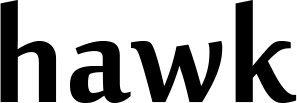

In [40]:
display test.png

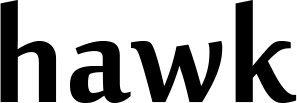

In [41]:
display < test.png

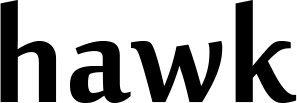

In [42]:
cat test.png | display

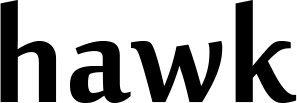

In [43]:
display http://localhost:8888/files/node_modules/hawk/images/hawk.png

In [44]:
%ls

./
  csv2htmltable.py
  data.csv
  date_trend.csv
  Demo_0_INDEX.ipynb
  Demo_html_find.ipynb
  Demo_IPython_Notebook.ipynb
  Demo_Metakernel_Bash-MoreComplete.ipynb
  Demo_Metakernel_Bash.ipynb
  Demo_Perl6-1liners.ipynb
  Demo__HTML_CSS_JavaScript_SVG.ipynb
  disk_usage.csv
  EUROPYTHON_2016_DEMO-Copy1.ipynb
  EUROPYTHON_2016_DEMO.ipynb
  example1_graph.png
  exdata-data-NEI_data.zip
  expdata-PA1-data.zip
  household_power_consumption.txt
  MOOC_Coursera_R.ipynb
  nova-list.txt
  plot1.png
  pop_age.csv
  pythreejs.ipynb
  Source_Classification_Code.rds
  summarySCC_PM25.rds
  test.dot
  test.png
  testfile
  Untitled.ipynb